Dataset Overview: UCI Syncora Synthetic¶
This dataset is a synthetic financial dataset designed to simulate real-world credit card customer behavior. It focuses on predicting whether a customer will default on their credit card payment in the next month based on past financial activity and demographic information.

Total Observations (Rows): 49,999
Total Features (Columns): 25
Target Variable: default.payment.next.month (0 = will pay, 1 = will default)
Data Types: All features are numerical (int64 and float64)

In [15]:
# import the important lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report ,confusion_matrix,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")


step 1: Libraray Import & Dataset Load

In [16]:
df=pd.read_csv("C:/Users/vishal/Downloads/UCI_Syncora_Synthetic.csv")
df.head()        

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,44893.650314,1,2,2,40,0,0,0,0,...,39360.399439,41649.500807,45785.835974,676.382844,2449.199711,2449.919030,680.223794,1615.226897,2121.893044,0
1,1,18424.519098,1,2,2,21,0,0,2,2,...,26782.295347,19924.719625,21855.940973,3242.199560,-41.876810,2750.676186,527.399083,1308.591377,514.357090,0
2,2,117876.942766,1,3,2,50,0,0,0,2,...,116157.189638,119962.735807,120028.667538,5274.265065,9610.239801,1575.956876,4876.071652,5475.820671,5109.827970,0
3,3,54723.377935,2,2,2,30,0,0,0,0,...,38065.930175,41540.058630,41878.685884,3270.158117,4596.396245,1604.847688,1427.425628,1673.040070,3355.872775,0
4,4,76558.094259,2,3,1,54,0,0,0,0,...,45179.788459,44981.277410,45357.868242,4672.139378,4242.405416,5329.088732,4598.029179,6111.203016,4883.652725,0


Step 2: Load Dataset and clean

In [17]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  49999 non-null  int64  
 1   LIMIT_BAL                   49999 non-null  float64
 2   SEX                         49999 non-null  int64  
 3   EDUCATION                   49999 non-null  int64  
 4   MARRIAGE                    49999 non-null  int64  
 5   AGE                         49999 non-null  int64  
 6   PAY_0                       49999 non-null  int64  
 7   PAY_2                       49999 non-null  int64  
 8   PAY_3                       49999 non-null  int64  
 9   PAY_4                       49999 non-null  int64  
 10  PAY_5                       49999 non-null  int64  
 11  PAY_6                       49999 non-null  int64  
 12  BILL_AMT1                   49999 non-null  float64
 13  BILL_AMT2                   499

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,24999.000000,167126.662762,1.597532,1.856117,1.556391,34.913598,-0.010840,-0.134203,-0.163703,-0.223964,...,43350.776213,40357.187166,38990.324240,5681.427723,5.884800e+03,5315.574885,4923.458746,4866.373531,5260.429843,0.218204
std,14433.612391,129389.679875,0.490400,0.795364,0.520025,9.213024,1.121737,1.196782,1.195190,1.153696,...,64852.723120,60887.223735,59592.733877,15529.563304,2.021087e+04,17667.839286,16061.663860,15400.026636,18180.141450,0.413031
min,0.000000,-401.439185,1.000000,0.000000,0.000000,18.000000,-2.000000,-3.000000,-3.000000,-3.000000,...,-192387.606577,-77988.204777,-233709.690512,-8614.726686,-1.380931e+04,-8212.163893,-7785.048513,-7680.862564,-8498.549728,0.000000
25%,12499.500000,55279.994116,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,4360.350182,3754.384863,3298.620791,816.994345,5.845065e+02,464.847943,373.986983,370.304458,317.505486,0.000000
50%,24999.000000,137605.335989,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,...,19609.362333,18258.953502,17445.779665,2433.939769,2.426047e+03,1951.106039,1705.945428,1752.391968,1715.574673,0.000000
75%,37498.500000,238648.339988,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55241.622763,51258.875965,49784.324009,5458.940866,5.485238e+03,4750.194567,4359.049243,4382.996660,4383.299546,0.000000
max,49998.000000,993540.261519,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,894533.366514,934955.515885,972881.774754,495932.585517,1.230354e+06,897621.893514,500472.456261,425668.733406,530326.542645,1.000000


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64
number of duplicated rows 0


<Axes: >

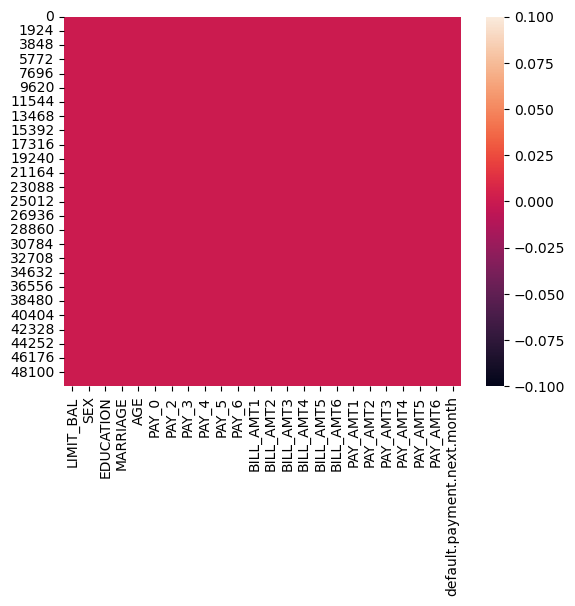

In [18]:
# deleting  unwanted column
df.drop("Unnamed: 0", axis=1,inplace=True)

# checcking the null valuse in the olumn
null_values=df.isnull().sum()
print(null_values)

#checking the duplicated rows
print("number of duplicated rows",df.duplicated().sum())

# checking the null values ploting the graph
sns.heatmap(data=df.isnull())

Step 3: EDA

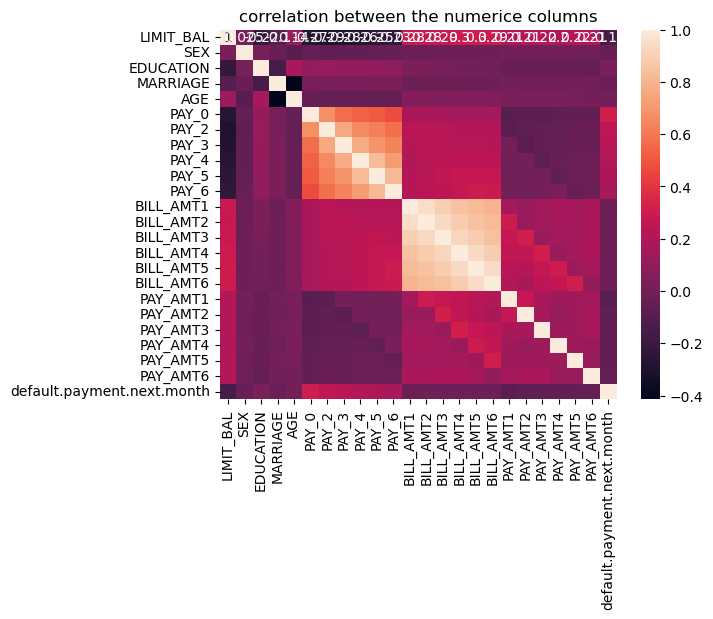

<Figure size 1500x1000 with 0 Axes>

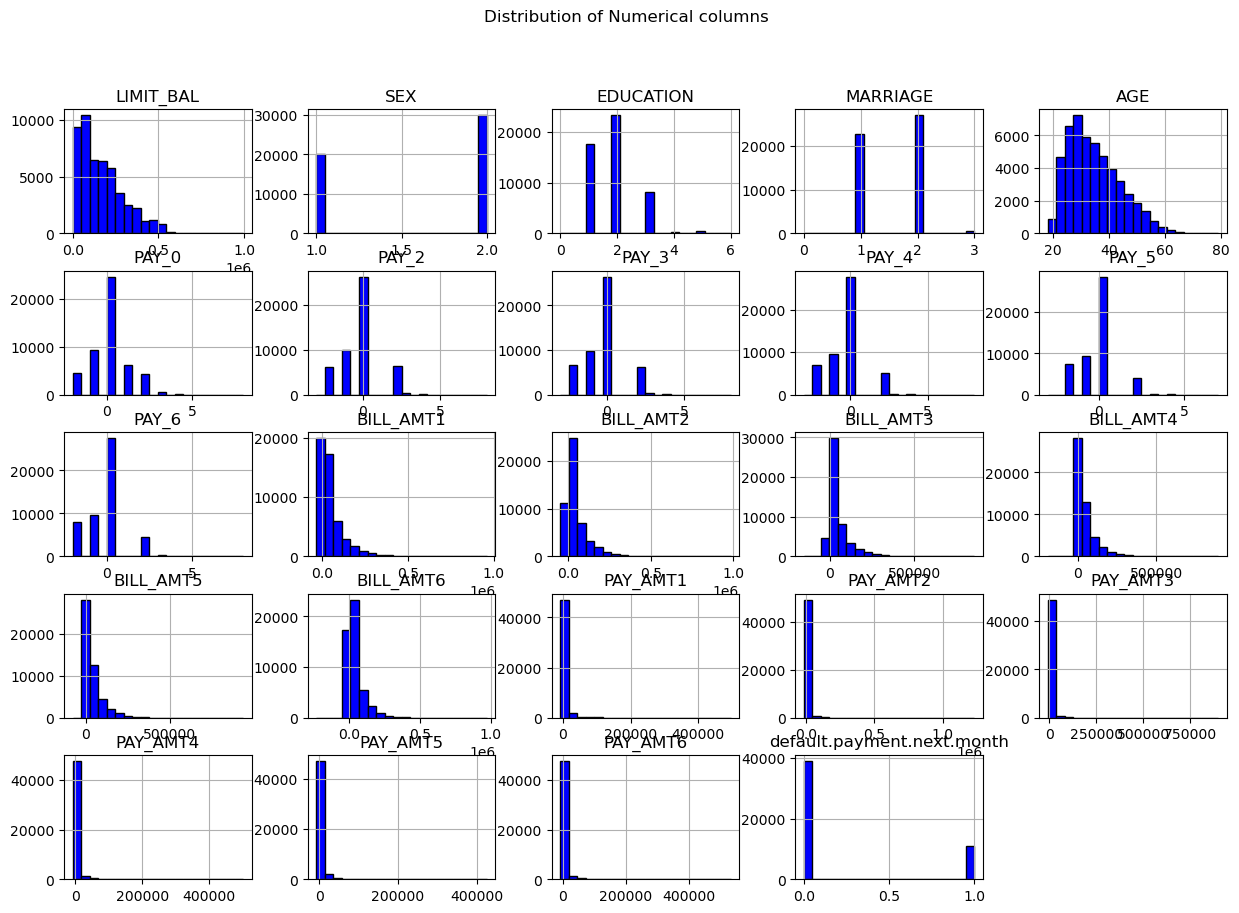

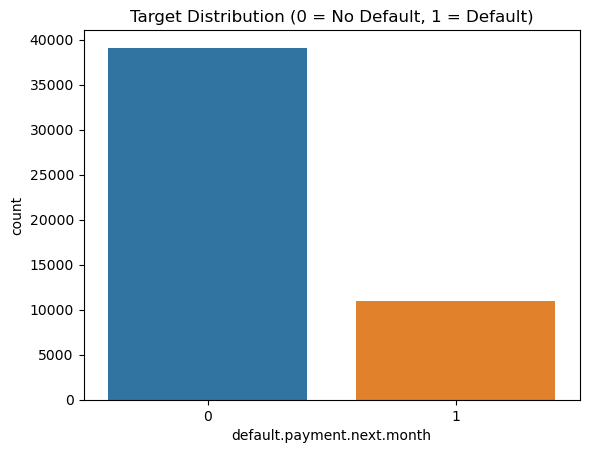

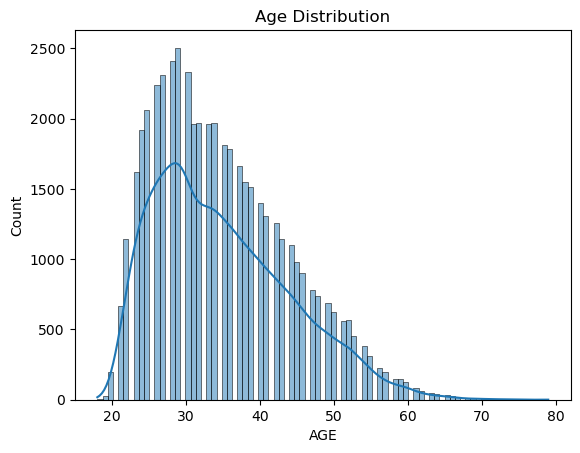

In [19]:
   # checking the  correlation  betwwen the two columns

plt.figure.figsize=(25,25)
df_num=df.select_dtypes(include=['float64','int64'])
sns.heatmap(data=df.corr(),annot=True)
plt.title("correlation between the numerice columns")
plt.show()          

#ploting the histplot checking
plt.figure(figsize=(15,10))
df.select_dtypes(include=['float64','int64']).hist(bins=20,figsize=(15,10),color="blue",edgecolor='black')
plt.suptitle("Distribution of Numerical columns")
plt.show()

# Target variable distribution
sns.countplot(x='default.payment.next.month', data=df)
plt.title("Target Distribution (0 = No Default, 1 = Default)")
plt.show()

# Age distribution
sns.histplot(df['AGE'],kde=True)
plt.title("Age Distribution")
plt.show()

Step 4 : Prepare Feature for passing the model

In [24]:
# seprating the independent and dependent columns
x=df.drop("default.payment.next.month",axis=1)
y=df["default.payment.next.month"]

# standardize feature
sc=StandardScaler()
x=sc.fit_transform(x)

#Train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.3)



# CREATE THE USER DIFINE FUNCTION AND PASSING THE OBJECT  OF CLASSIFICATON ALGORITHEM
def create_model(model):
    # user deinfe object of classification algorithm
    model.fit(x_train,y_train)#train the  model with 70%  data
    y_pred=model.predict(x_test)# Test the model  with 30%  testing  input
    # print confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    # print classification Report 
    print(classification_report(y_test,y_pred))
    print("Roc AUC Score",roc_auc_score(y_test,y_pred))

    
    return model

#checking the model with logisticRegression
print("The Model accuracy the LogisticRegression")
lr=LogisticRegression()
lr=create_model(lr)

print("   ###  USING THE RandomForectClassifier  ####") 
# create the object of  randomForestClassifier class
#for i in range(10,100):
   # rfc=RandomForestClassifier(random_state=2,n_estimators=i,class_weight='balanced')
    # n_estimators inbuilt parameter  means no of decission treee first will take 10 than 11....
    #print("No of  Decission Tree",i)
    #rc=create_model(rfc)
# this loop is used to check which is best fitting tree while using the RandomFrestClassifier
# to make  select the best using this
rfc=RandomForestClassifier(random_state=1,n_estimators=80)
rfc=create_model(rfc)


print(" Using the XGBClassifier")

# XGBooost inbuilt class which is define in xgboost inbuilt package
#for i in range(10,101):
    # create object of XGBClassifier class and pass the parameter
    #xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1) # reg alpha=1 menas True
    #print("No of Tree:",i)
    #class function
    #xgb=create_model(xgb)

xgb=XGBClassifier(n_estimatores=83,random_state=1,reg_aplha=1)
xbg=create_model(xgb)

The Model accuracy the LogisticRegression
[[11417   295]
 [ 2669   619]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89     11712
           1       0.68      0.19      0.29      3288

    accuracy                           0.80     15000
   macro avg       0.74      0.58      0.59     15000
weighted avg       0.78      0.80      0.76     15000

Roc AUC Score 0.5815362495512744
   ###  USING THE RandomForectClassifier  ####
[[11412   300]
 [ 1883  1405]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     11712
           1       0.82      0.43      0.56      3288

    accuracy                           0.85     15000
   macro avg       0.84      0.70      0.74     15000
weighted avg       0.85      0.85      0.84     15000

Roc AUC Score 0.7008483407123769
 Using the XGBClassifier
[[11134   578]
 [ 1931  1357]]
              precision    recall  f1-score   support

           0      

The best  accuracy  came from the RandomForestclassifier is 70%
The second best come from the XGBClassifier is 68% 

According to  my overvation the accuracy less because of the training Data output columns had 
biased  input of 0 and 1 
That led to give the leass parameter for training data  of 1